#**Objetivo:** 

 

La empresa “**Pedidos Ya Market**” realiza ventas de productos por catálogo y web.
El objetivo de este análisis se basa en encontrar tendencias y patrones de cuanto será el gasto futuro de los clientes tomando en consideración el perfil de cada tipo de clientes y las compras realizadas (por la web, por catálogos, con descuentos, etc) en la empresa “Pedidos Ya Market”.


#**Contexto Comercial**

El área de marketing cuenta con científicos de datos que le permitirán analizar las compras que se realizaron en el pasado con el objetivo de entender comportamientos futuros.
De esta manera las campañas de Marketing apuntaran a clientes específicos donde se conoce y espera un buen resultado. 
Propósitos: 
Establecer un modelo que permite la predicción de las ventas, mejorando con ello costos y creación de mejores estrategias. 
Determinar las técnicas de machine Learning para analizar las características de clientes que más compran y de esta manera lanzar campañas que apunten a los mismos.   
 Establecer las recomendaciones basadas en las técnicas y modelos para “Pedidos Ya Market”.


#**Problema Comercial**

Las hipótesis secundarias para evaluar son:

•	¿Los ingresos de los clientes tiene que ver con la cantidad de quejas en los 2 ultimos años?

• ¿Existe una relación entre el gasto realizado y el estudio de los consumidores?

•	La cantidad de hijos menores o adolescentes esta relacionado con los gastos, de que tipo (pescado, vino, etc)

•	¿Existe una relación entre la cantidad gastada y el Estado civil?

•	¿Existe una relación entre la cantidad de compras en la web y el total de gastos?

•	¿Existe una relación entre el monto gastado total y los ingresos?

• ¿Como se relacionan las variables en general, que correlación tienen?

• ¿Que relación tiene los tipos de compras con las otras variables? Como por ejemplo con los descuentos o el numero de hijos 


Descripción del data Set La adquisición de datos fueron obtenidos en 5 campañas de encuestas promocionales.


Para poder generar una respuesta al objetivo del análisis por medio de machine learning y cargaran a continuación las distintas librerías necesarias para el análisis, creación de gráficos, para omisión de mensajes de advertencia, procesamiento de la data y ejecución de los modelos de predicción. 

## Librerias

In [90]:
! pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [91]:
! pip install bqplot
! pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [92]:
#importo las librerias 
import pandas                  as pd
from datetime import datetime
from pandas.core.indexes.datetimes import date
from   scipy import stats
import numpy                   as np
import matplotlib.pyplot       as plt
%matplotlib inline
import seaborn                 as sns
import statsmodels.formula.api as sm
import chart_studio.plotly     as py
import os
from plotnine.data import mpg
import matplotlib.pyplot       as plot
from plotnine import ggplot, aes, geom_point
from bokeh.resources import INLINE
import bokeh.io
from bokeh import *
import pingouin
bokeh.io.output_notebook(INLINE)
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# métrica y datasets
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# modelos
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# feature engineering
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler

# visualización
from seaborn import heatmap
from sklearn.metrics import mean_absolute_error


from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest

import pandas as pd
import numpy as np
from sklearn import feature_selection
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression

In [93]:
!pip install mlxtend
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [94]:
from sklearn.preprocessing import OrdinalEncoder

In [95]:
!pip install sidetable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [96]:
#leer CSV dentro de un DataFrame
df=pd.read_csv('marketing_campaignLIMPIO.csv', sep=',')

In [97]:
#informacion del data set, nulos y tipos de datos 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2228 entries, 0 to 2227
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2228 non-null   int64  
 1   Year_Birth           2228 non-null   int64  
 2   Education            2228 non-null   object 
 3   Marital_Status       2228 non-null   object 
 4   Income               2228 non-null   float64
 5   Kidhome              2228 non-null   int64  
 6   Teenhome             2228 non-null   int64  
 7   Dt_Customer          2228 non-null   object 
 8   Recency              2228 non-null   int64  
 9   MntWines             2228 non-null   int64  
 10  MntFruits            2228 non-null   int64  
 11  MntMeatProducts      2228 non-null   int64  
 12  MntFishProducts      2228 non-null   int64  
 13  MntSweetProducts     2228 non-null   int64  
 14  MntGoldProds         2228 non-null   int64  
 15  NumDealsPurchases    2228 non-null   i

In [98]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,2228.0,NaN,NaN,NaN,1117.429533,645.592761,0.0,557.75,1117.5,1676.25,2239.0
Year_Birth,2228.0,NaN,NaN,NaN,1968.783214,11.986864,1893.0,1959.0,1970.0,1977.0,1996.0
Education,2228,5,Graduation,1123,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,2228,5,Married,861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,2228.0,NaN,NaN,NaN,51624.511684,20609.636927,1730.0,35409.0,51566.0,68118.0,113734.0
Kidhome,2228.0,NaN,NaN,NaN,0.445242,0.538721,0.0,0.0,0.0,1.0,2.0
Teenhome,2228.0,NaN,NaN,NaN,0.507181,0.544757,0.0,0.0,0.0,1.0,2.0
Dt_Customer,2228,663,2012-08-31,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recency,2228.0,NaN,NaN,NaN,49.149013,28.945271,0.0,24.0,49.5,74.0,99.0
MntWines,2228.0,NaN,NaN,NaN,304.86939,337.065699,0.0,24.0,174.5,505.0,1493.0


Columnas categoricas: Etapa, Education, Marital_Status       

In [99]:
#numero de filas y columnas 
df.shape

(2228, 31)

# Análisis I
¿Los ingresos de los clientes tiene que ver con la cantidad de quejas en los 2 ultimos años?

In [100]:
df2=df

In [101]:
df3=df

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 63.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.


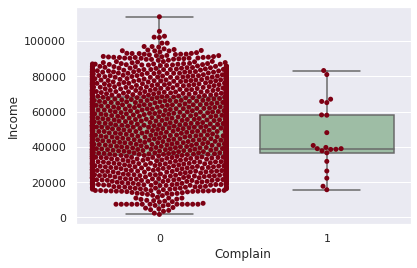

In [102]:
#Analizo la cantidad de reclamos de acuerdo a los ingresos de las personas
ax = sns.boxplot(x='Complain', y = 'Income', data = df, color='#99c2a2')
ax = sns.swarmplot(x='Complain', y = 'Income', data = df, color='#7d0013')
plt.show()

In [103]:
import scipy.stats as stats
# stats f_oneway esta función toma los grupos como entrada y devuelve el valor ANOVA F y p
fvalue, pvalue = stats.f_oneway(df['Complain'], df['Income'])
print(fvalue, pvalue)

13979.32685082639 0.0


METODO ANOVA

Hipótesis nula: las medias de los grupos son iguales (sin variación en las medias de los grupos) H0: μ1=μ2=…=μp

Hipótesis alternativa: Al menos, la media de un grupo es diferente de otros grupos H1: Todos los μ no son iguales

Si se cumple la hipótesis nula, F adquiere el valor de 1 ya que la intervarianza será igual a la intravarianza. **Cuanto más difieran las medias de los grupos mayor será la varianza entre medias en comparación al promedio de la varianza dentro de los grupos**, obteniéndose valores de F superiores a 1 y por lo tanto menor la probabilidad de que la distribución adquiera valores tan extremos (menor el p-value).

Si se cumple la hipótesis nula, F adquiere el valor de 1 ya que la intervarianza será igual a la intravarianza. Cuanto más difieran las medias de los grupos mayor será la varianza entre medias en comparación al promedio de la varianza dentro de los grupos, obteniéndose valores de F superiores a 1 y por lo tanto menor la probabilidad de que la distribución adquiera valores tan extremos (menor el p-value).

Por esta razón no tomamos la variable Complain para el resto del estudio

# Análisis II
¿Existe una relación entre el gasto realizado y el estudio de los consumidores?

In [104]:
# monto total gastado en carne, pescado, dulce, frutas y vino 
df_marketing= df


In [105]:
df_marketing['Mnt_total'] = df_marketing['MntWines'] + df_marketing['MntFruits'] +df_marketing['MntMeatProducts'] +df_marketing['MntFishProducts'] +df_marketing['MntSweetProducts'] +df_marketing['MntGoldProds']
df_marketing[["Education", "Mnt_total"]].head(2240)

,Education,Mnt_total
0,Graduation,1617
1,Graduation,27
2,Graduation,776
3,Graduation,53
4,PhD,422
...,...,...
2223,Graduation,1341
2224,PhD,444
2225,Graduation,1241
2226,Master,843


In [106]:
#veo el promedio de las ededes por nivel de educación
educacionxedad=df.groupby(['Education']).agg({'EDAD': 'mean'})
educacionxedad

,EDAD
Education,
2n Cycle,50.714286
Basic,45.537037
Graduation,53.403384
Master,56.105978
PhD,56.968750


In [107]:
import sidetable
df.stb.freq(['Education'])

,Education,count,percent,cumulative_count,cumulative_percent
0,Graduation,1123,50.403950,1123,50.403950
1,PhD,480,21.543986,1603,71.947935
2,Master,368,16.517056,1971,88.464991
3,2n Cycle,203,9.111311,2174,97.576302
4,Basic,54,2.423698,2228,100.000000


Son muy pocos registros con el nivel Basic

In [108]:
df_marketing.groupby("Education").Mnt_total.sum()

Education
2n Cycle      100795
Basic           4417
Graduation    695612
Master        225131
PhD           322503
Name: Mnt_total, dtype: int64

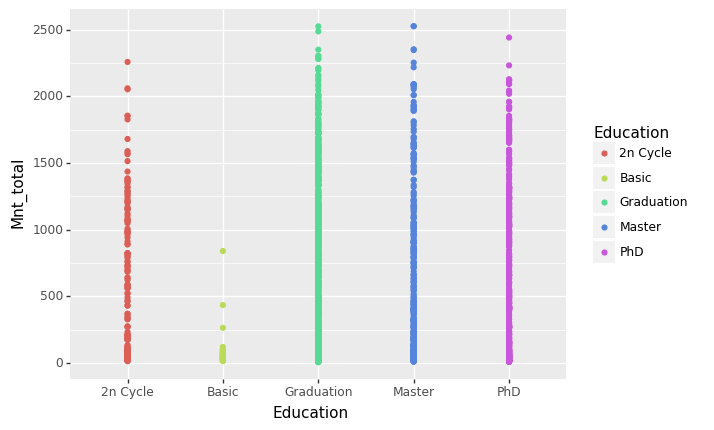

<ggplot: (8741953123094)>

In [109]:

ggplot(df_marketing, aes(x='Education', y='Mnt_total', color='Education')) + geom_point()

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 25.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 10.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 8.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.


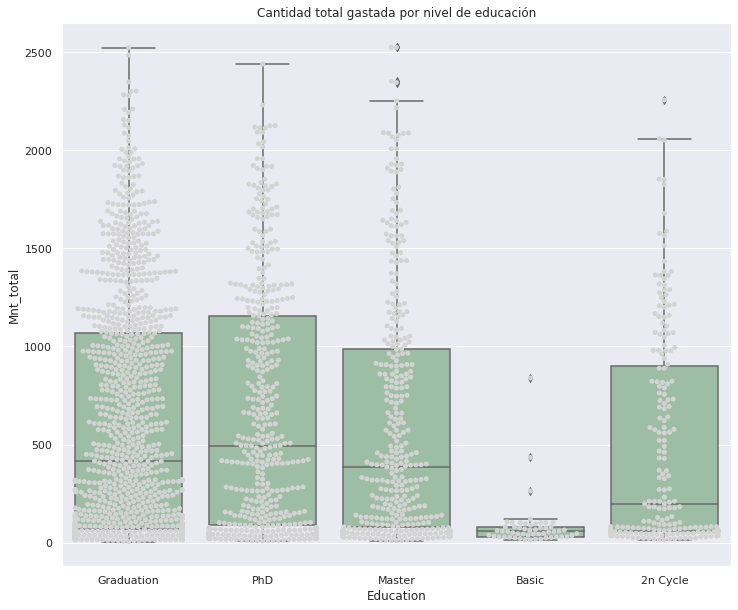

In [110]:
fig, ax = plt.subplots(figsize=(12,10))
ax = sns.boxplot(x='Education', y = 'Mnt_total', data = df_marketing, color='#99c2a2')
ax = sns.swarmplot(x='Education', y = 'Mnt_total', data = df_marketing, color='lightgray')

plt.title('Cantidad total gastada por nivel de educación')
plt.show()

En el gráfico se comparan el nivel de educación por el importe total gastado. Los que tienen un PhD realizan mas compras en general que los graduados o los que tienen master. Se observa una mayor dispersión en los de 2n ciclo al tener un rango mas amplio y teniendo una mediana menor al resto.

Buscando la relación entre el nivel de ingreso con el estado civil y el nivel de educación`

In [111]:
tabla = df.pivot_table(index='Education', columns = 'Marital_Status', values = ['Income'], aggfunc = 'mean' )
tabla

Income                                            \
Marital_Status      Divorced       Married        Single      Together   
Education                                                                
2n Cycle        49395.130435  46275.743844  53635.385172  44868.179848   
Basic            9548.000000  21960.500000  18238.666667  21240.071429   
Graduation      53683.686441  50813.625879  51276.349834  53238.036096   
Master          50331.945946  53286.028986  53633.197368  51108.333385   
PhD             53096.615385  56485.452395  53116.742452  55091.855615   

                              
Marital_Status         Widow  
Education                     
2n Cycle        51392.200000  
Basic           22123.000000  
Graduation      54976.657143  
Master          57888.687613  
PhD             60288.083333

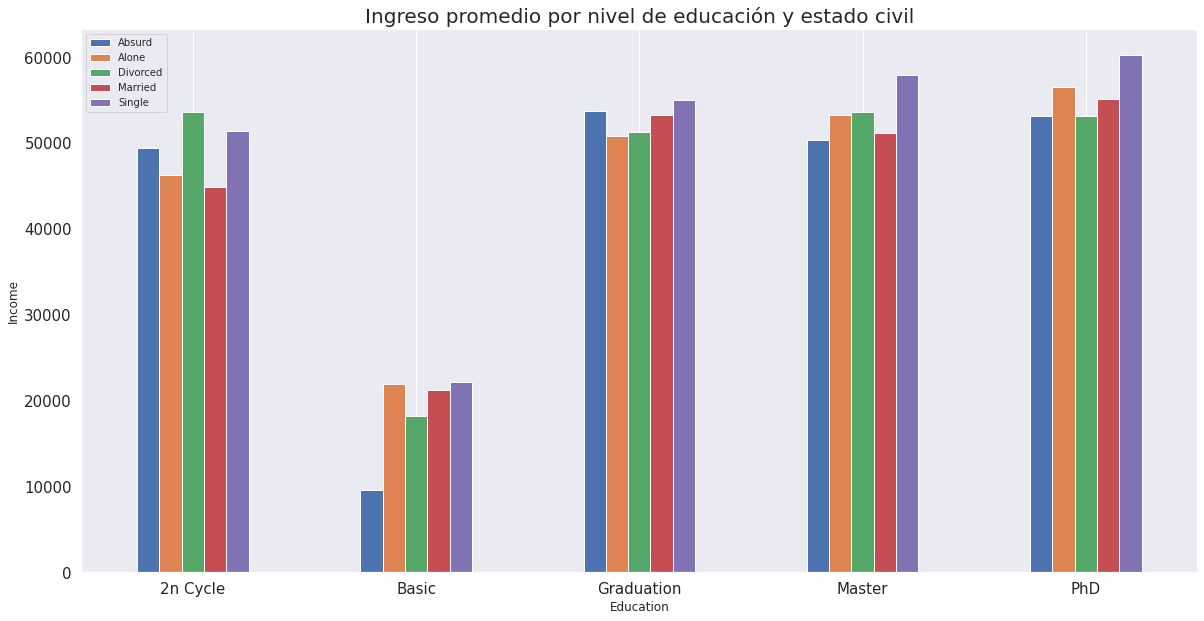

In [112]:
tabla.plot(kind='bar', figsize=(20,10), fontsize=15)
plot.xlabel('Education')
plot.ylabel('Income')
plot.title('Ingreso promedio por nivel de educación y estado civil', fontsize=20)
plot.legend(labels=['Absurd', 'Alone', 'Divorced', 'Married', 'Single', 'Together', 'Widow', 'YOLO' ], fontsize=10)
plot.xticks(rotation=0)
plot.grid(axis='y')

# Análisis III
¿Existe una relación entre la cantidad de compras de vino segun tenga hijos pequeños o adolecentes?

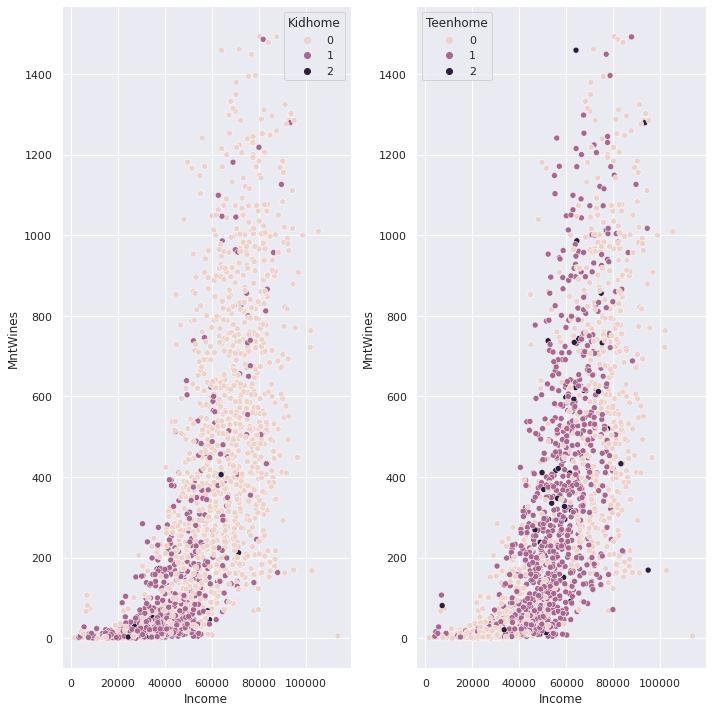

In [113]:
f, axs = plt.subplots(1, 2, figsize=(10, 10), gridspec_kw=dict(width_ratios=[4, 4]))
sns.scatterplot(x='Income', y='MntWines', hue='Kidhome', data=df, ax=axs[0]);
sns.scatterplot(x='Income', y='MntWines', hue='Teenhome', data=df, ax=axs[1]);
f.tight_layout()

Conclusión: los que tienen hijos adolecentes compran mas vino que los que tienen hijos pequeños. Se observa esta tendencia cuando cobran entre 40000 y 60000 pesos (Y es por que ahí esta la mediana) y gastan en vinos entre 0 a 600 pesos (en mayor cantidad).
Por el contrario, los que poseen niños pequeños compan entre 0 a 200 pesos en vino. Esta misma tendencia se observa para los otros tipos de compras también.

La mayor concentración de gastos esta en el primer histograma. 

# Análisis IV
¿Existe una relación entre la cantidad gastada y el Estado civil?

Analizamos la distribución entre los grupos de Estado civil

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 44.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 50.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 62.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 28.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.


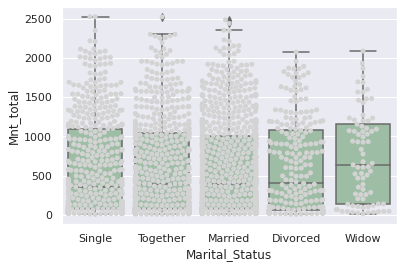

In [114]:
ax = sns.boxplot(x='Marital_Status', y = 'Mnt_total', data = df_marketing, color='#99c2a2')
ax = sns.swarmplot(x='Marital_Status', y = 'Mnt_total', data = df_marketing, color='lightgray')
plt.show()

Las medias son similares, salvo la de viudos donde es mas alta. En esta categoría se observan menos registros que en las otras

# Análisis V
¿Existe una relación entre la cantidad de compras en la web y el total de gastos?

Text(0.5, 1.05, 'Correlación entre la compras realizadas en el sitio web y los gastos')

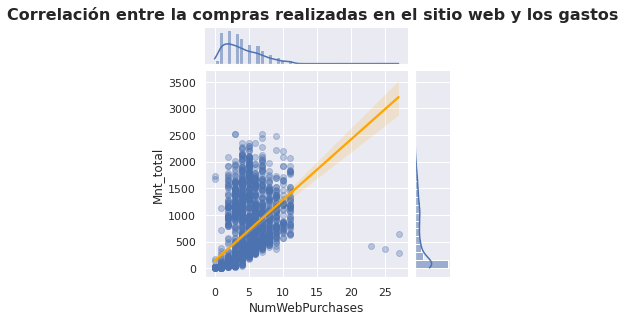

In [115]:
# Gráfico de dispersión entre número de compras realizadas en el sitio web y los gastos 
g = sns.jointplot(x="NumWebPurchases", y="Mnt_total",
                 data=df_marketing, kind="reg",
                 line_kws={'color':'orange'},
                  scatter_kws={'alpha': 0.33},
                )
g.fig.set_size_inches(4, 4)
g.fig.suptitle("Correlación entre la compras realizadas en el sitio web y los gastos",
                fontsize=16, weight="bold", y=1.05)

Text(0, 0.5, 'Frecuencia absoluta')

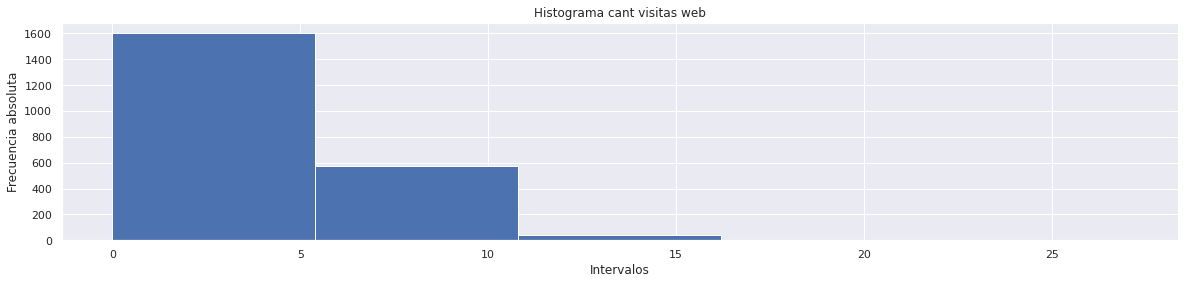

In [116]:

fig, ax = plt.subplots(figsize=(20, 4))
x_hist =df_marketing.NumWebPurchases.values.flatten()
ax.hist(x_hist, bins=5)
ax.set_title('Histograma cant visitas web')
ax.set_xlabel('Intervalos')
ax.set_ylabel('Frecuencia absoluta')

In [117]:
df_marketingfiltro=df_marketing

In [118]:
filtro =df_marketing['NumWebPurchases'] < 17

In [119]:
df_marketingfiltro= df_marketing[filtro]

Text(0.5, 1.05, 'Correlación entre la compras realizadas en el sitio web y los gastos')

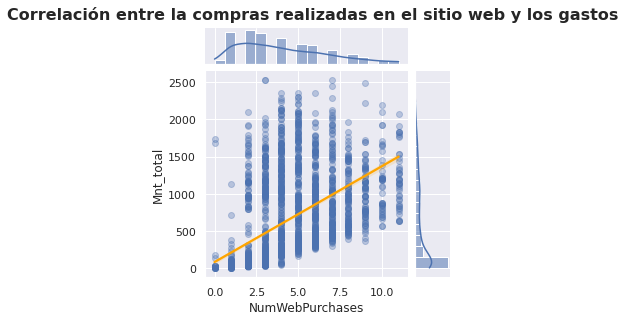

In [120]:
# Gráfico de dispersión entre número de compras realizadas en el sitio web y los gastos 
g = sns.jointplot(x="NumWebPurchases", y="Mnt_total",
                 data=df_marketingfiltro, kind="reg",
                 line_kws={'color':'orange'},
                  scatter_kws={'alpha': 0.33},
                )
g.fig.set_size_inches(4, 4)
g.fig.suptitle("Correlación entre la compras realizadas en el sitio web y los gastos",
                fontsize=16, weight="bold", y=1.05)

Y obviamente hay una tendencia lineal positiva, a medida que crece el numero de compras realizadas en el sitio web tambien crece el monto en los gastos. 
Eliminamos el dato atipico, No resulta logico que ingrese 25 veces y no gaste nada.

A continuación vemos que no hay concentracion de 15 a 25 visitas.

# Análisis VI
¿Existe una relación entre el monto gastado total y los ingresos?

Analizamos primero la variable 'Mnt_total'.
Su distribución y estadisticas de esta variable

In [121]:
df_marketing['Mnt_total'].describe()

count    2228.000000
mean      605.232496
std       601.701944
min         5.000000
25%        69.000000
50%       396.000000
75%      1043.250000
max      2525.000000
Name: Mnt_total, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


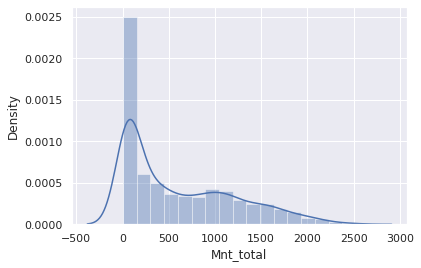

In [122]:
sns.distplot(df_marketing['Mnt_total']);

Se observan como dos curvas una mas alta que la otra.
La curva mayor posee asimetría positiva:  la distribución tiene más valores diferentes a la derecha de la media que a su izquierda.

Analizamos el pico alto en 0 a continuación

Text(0, 0.5, 'Frecuencia absoluta')

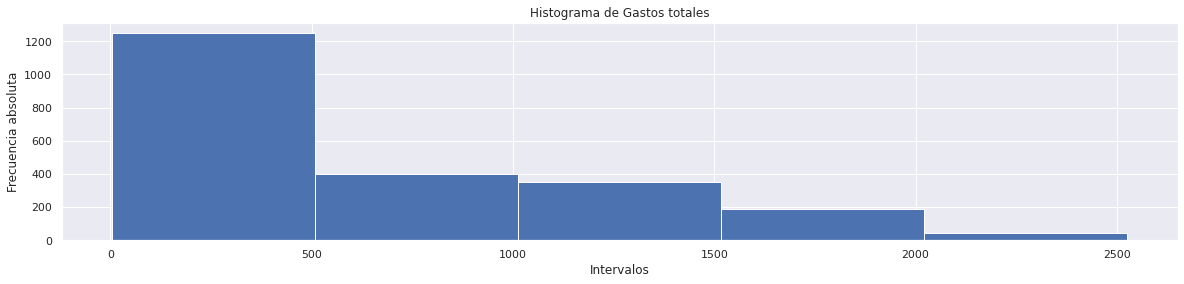

In [123]:
fig, ax = plt.subplots(figsize=(20, 4))
x_hist =df_marketing.Mnt_total.values.flatten()
ax.hist(x_hist, bins=5)
ax.set_title('Histograma de Gastos totales')
ax.set_xlabel('Intervalos')
ax.set_ylabel('Frecuencia absoluta')

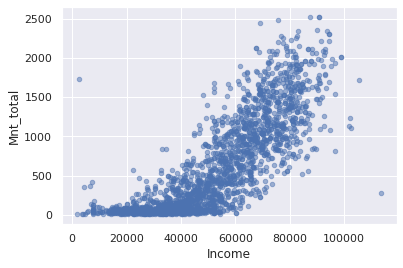

In [124]:
#Relacion de Moto total gastado y el total de ingresos
var = 'Income'
data = pd.concat([df_marketing['Mnt_total'], df_marketing[var]], axis=1)
data.plot.scatter(x=var, y='Mnt_total', alpha = 0.5);

Income (ingresos) mantienen una relación lineal positiva con Mnt_total (gastos), aumentando en el mismo sentido. NumCatalogPurchases Tambien pero no tan definida. 


#Análizamos la variable gasto total con el resto

In [125]:
from pandas.api.types import is_numeric_dtype



def univariado_info(df):
  '''Calculo de informacion estadistias y genericas de cada columna de un dataframe'''

  #create a dataframe with especificas columnas

  df_info = pd.DataFrame(columns=['Cantidad', 'Tipo' , 'Missing', 'Unicos', 'Numeric'])
  #loop de todas las variables del dataframe
  for col in df:

      #obtengo info de la columna
      data_series = df[col]
      #lleno dataframe con las columnas iniciales
      df_info.loc[col] = [data_series.count(), data_series.dtype, data_series.isnull().sum(), data_series.nunique(), is_numeric_dtype(data_series)]

  #calculo el describe 
  df_describe = df.describe(include='all').T[['top', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
  #calculo sesgo y curtosis
  df_stats = pd.DataFrame([df.skew(), df.kurtosis()], index=['sesgo', 'kurt']).T

  return pd.concat([df_info,pd.concat([df_describe, df_stats], axis=1)], axis=1).fillna('-')


df_uni_stats = univariado_info(df)
df_uni_stats

<ipython-input-125-30fec3a42eb9>:22: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


,Cantidad,Tipo,Missing,Unicos,Numeric,top,mean,std,min,25%,50%,75%,max,sesgo,kurt
Unnamed: 0,2228,int64,0,2228,True,-,1117.429533,645.592761,0.0,557.75,1117.5,1676.25,2239.0,-0.000081,-1.198329
Year_Birth,2228,int64,0,59,True,-,1968.783214,11.986864,1893.0,1959.0,1970.0,1977.0,1996.0,-0.348272,0.719189
Education,2228,object,0,5,False,Graduation,-,-,-,-,-,-,-,-,-
Marital_Status,2228,object,0,5,False,Married,-,-,-,-,-,-,-,-,-
Income,2228,float64,0,1966,True,-,51624.511684,20609.636927,1730.0,35409.0,51566.0,68118.0,113734.0,0.013186,-0.825515
Kidhome,2228,int64,0,3,True,-,0.445242,0.538721,0.0,0.0,0.0,1.0,2.0,0.632525,-0.781362
Teenhome,2228,int64,0,3,True,-,0.507181,0.544757,0.0,0.0,0.0,1.0,2.0,0.405231,-0.985308
Dt_Customer,2228,object,0,663,False,2012-08-31,-,-,-,-,-,-,-,-,-
Recency,2228,int64,0,100,True,-,49.149013,28.945271,0.0,24.0,49.5,74.0,99.0,-0.004359,-1.20093
MntWines,2228,int64,0,776,True,-,304.86939,337.065699,0.0,24.0,174.5,505.0,1493.0,1.17089,0.583274


Podemos ver desde esta información:

Income: esta muy distribuido.

Hijos_totales: en esta muestra, solo poseen una cantidad de: 0, 2 0 4 hijos. por que hay tres valores distintos, el max en 4 y el min es 0

Los Gastos tambien estan distribuidos con muchos valores distintos.

Las Purchases (compras) poseen valores continuos

In [126]:
#tabla de frecuencias custom
import math

def sturges_intervals(data):
  #sturges rules to select bin
  k = 1 + 3.322 * math.log10(len(data))
  periodos = math.ceil(k)

  #generacion de intervalos en base al rango y periodo
  intervals = pd.interval_range(
      start=data.min(),
      end=data.max() + 1,
      periods=k,
      name="Intervalo",
      closed="left")
  
  #redondeo de los valores de corte
  inter = pd.IntervalIndex([
    pd.Interval( round(i.left,1), round(i.right,1), i.closed )
    for i in intervals])
  
  return inter, periodos


def freq_table(df, col, with_cuts=True):

  #seleccion de data
  data = df[col]

  #verificacion de columna y si queremos cortes de intervalos
  if not is_numeric_dtype(data) or not with_cuts:
    #generaion de tabla de frecuenca ,con info absoluta
    freq_tab = pd.crosstab(data, columns='FreqAbs').sort_values('FreqAbs', ascending=False)
  
  else:

    #generacion de dataframe con cortes
    freq_tab = pd.DataFrame(index=sturges_intervals(data)[0])
    freq_tab["FreqAbs"] = pd.cut(data, bins=freq_tab.index).value_counts()
    freq_tab["Marca"]  = freq_tab.index.mid

    freq_tab["LimInf"] = freq_tab.index.left
    freq_tab["LimSup"] = freq_tab.index.right

  
  #calculo del resto de la tabla de frecuencia
  freq_tab['FreqRel'] = freq_tab['FreqAbs'] / freq_tab['FreqAbs'].sum()
  freq_tab[['FAbsAcumulada', 'FAbsRelativa']] = freq_tab[['FreqAbs','FreqRel']].cumsum()
  return freq_tab

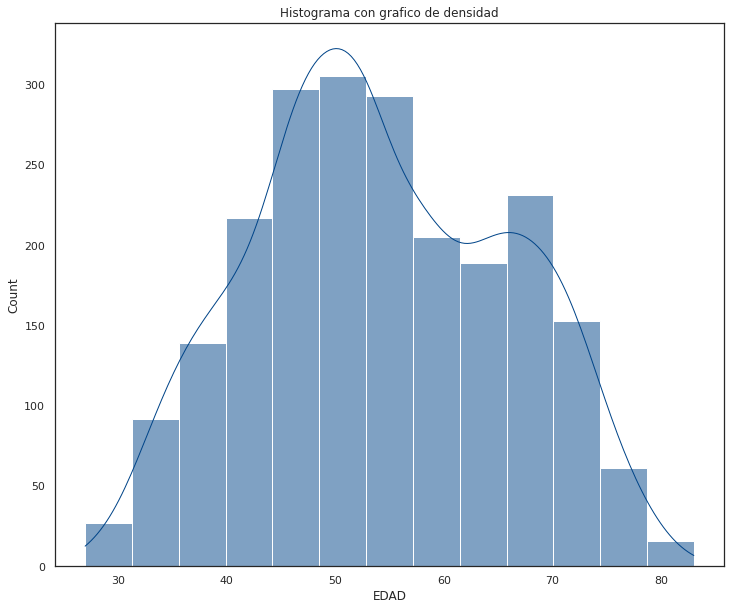

In [127]:
sns.set(style="white", rc={"lines.linewidth": 1})
fig, axes = plt.subplots(figsize=(12,10))
sns.histplot(x='EDAD',
            data=df[df['EDAD']<100] ,
            color='#004488',
            ax=axes,
            bins= sturges_intervals(df['EDAD'])[1],
            kde=True).set(title='Histograma con grafico de densidad');

Vamos a trabajar con algunas variables Numericas.
Elimino las columnas que componen la variable Mnt_total. recordemos que Mnt_total es una columna calculada de la suma de: ['MntWines'] + ['MntFruits'] + ['MntMeatProducts'] + ['MntFishProducts'] + ['MntSweetProducts'] + ['MntGoldProds']

In [128]:
df_marketing2=df_marketing

In [129]:
df_marketing2= df_marketing2.drop(['MntWines'], axis=1)

In [130]:
df_marketing2= df_marketing2.drop(['MntFruits'], axis=1)

In [131]:
df_marketing2= df_marketing2.drop(['MntMeatProducts'], axis=1)

In [132]:
df_marketing2= df_marketing2.drop(['MntFishProducts'], axis=1)

In [133]:
df_marketing2= df_marketing2.drop(['MntSweetProducts'], axis=1)

In [134]:
df_marketing2= df_marketing2.drop(['MntGoldProds'], axis=1)

Matriz de correlación entre todas las variables numericas

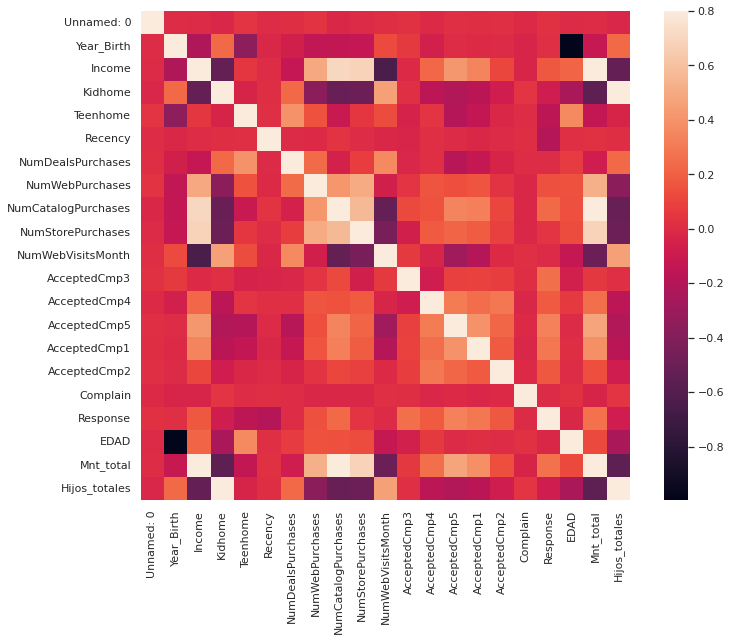

In [135]:
corrmat = df_marketing2.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

El mapa de calor es una forma visual muy útil para para conocer las variables y sus relaciones.

Las correlaciones de la variable 'Mnt_total' se destacan 'Income' (ingresos) y 'NumCatalogPurchases' (numero de compras realizadas usando el catálogo). 

Las que componen la variable Mnt_total obviamente tambien serian fuertes por eso las elimine

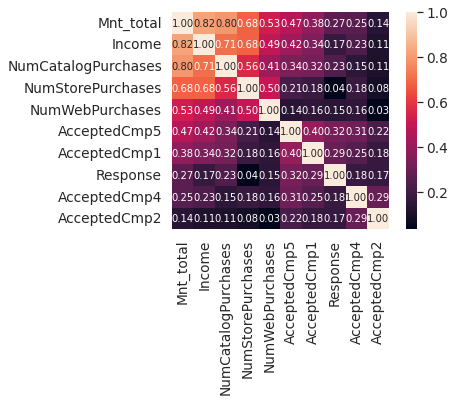

In [136]:
# Matriz de correlación de Mnt_total con respecto al resto
k = 10 # Número de variables.
cols = corrmat.nlargest(k, 'Mnt_total')['Mnt_total'].index
cm = np.corrcoef(df_marketing2[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size': 10}, yticklabels = cols.values, xticklabels = cols.values)
plt.show()

Aqui se ve la correlación alta de 0.82 entre'Mnt_total' e 'Income' y la correlacion de 0.8 entre'Mnt_total' y 'NumCatalogPurchases'

In [137]:
corr = df_marketing2.corr()
corr[['Mnt_total']].sort_values(by = 'Mnt_total',ascending = False).style.background_gradient()

,Mnt_total
Mnt_total,1.000000
Income,0.819871
NumCatalogPurchases,0.796044
NumStorePurchases,0.680953
NumWebPurchases,0.525218
AcceptedCmp5,0.471701
AcceptedCmp1,0.382601
Response,0.266536
AcceptedCmp4,0.254526
AcceptedCmp2,0.136417


Diagramas de dispersión entre 'Mnt_total' y sus variables correladas

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.


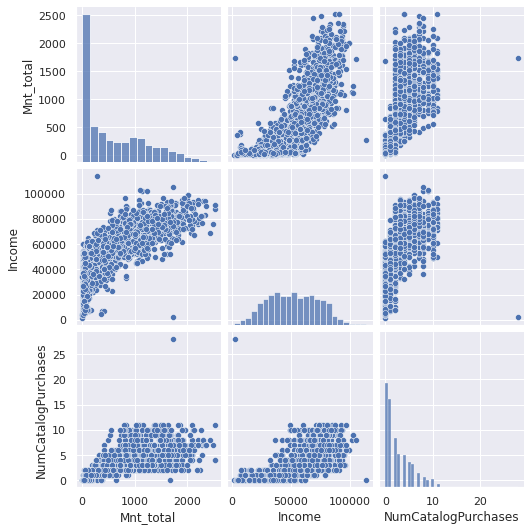

In [138]:
sns.set()
cols = ['Mnt_total', 'Income', 'NumCatalogPurchases']
sns.pairplot(df_marketing2[cols], size = 2.5)
plt.show();

##Feature selection
Variables independientes: 'Mnt_total','Income', 'NumCatalogPurchases','NumStorePurchases','NumWebPurchases'

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


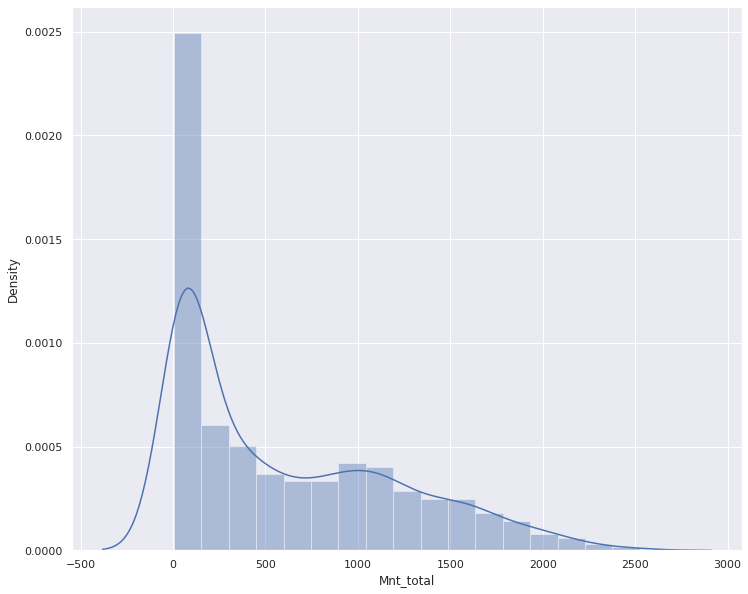

In [139]:
fig, axes = plt.subplots(figsize=(12,10))
sns.distplot(df['Mnt_total']);

La mayoria no gasta o esta muy cerca de 0.

In [140]:
df_marketingFS=df_marketing2 [['Mnt_total','Income', 'NumCatalogPurchases','NumStorePurchases','NumWebPurchases']]

In [141]:

X = df_marketingFS.values
X_2= np.average(X,axis=0);X_3= np.std(X,axis=0)
df_n = pd.DataFrame();df_n['labels']=df_marketingFS.columns
df_n['Valores']=X_2;df_n['Sd']=X_3;df_n.index=df_n['labels']
df_n['Trim']=stats.trim_mean(X, 0.1)
df_n= df_n.drop(columns='labels')
df_n[['Valores', 'Sd','Trim']] = MinMaxScaler().fit_transform(df_n[['Valores', 'Sd','Trim']])
df_n

,Valores,Sd,Trim
labels,,,
Mnt_total,0.011673,2.906441e-02,0.010140
Income,1.000000,1.000000e+00,1.000000
NumCatalogPurchases,0.000000,8.481929e-07,0.000000
NumStorePurchases,0.000061,2.277135e-05,0.000064
NumWebPurchases,0.000028,0.000000e+00,0.000031


In [142]:
feature_mtx=df_n.values
feature_mtx
import scipy
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])
import pylab
import scipy.cluster.hierarchy

Z = scipy.cluster.hierarchy.linkage(D, 'complete')
Z

<ipython-input-142-88e665f65a3d>:5: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
<ipython-input-142-88e665f65a3d>:12: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


array([[2.00000000e+00, 4.00000000e+00, 8.13127798e-05, 2.00000000e+00],
       [3.00000000e+00, 5.00000000e+00, 1.66294135e-04, 3.00000000e+00],
       [0.00000000e+00, 6.00000000e+00, 7.19730622e-02, 4.00000000e+00],
       [1.00000000e+00, 7.00000000e+00, 3.84545226e+00, 5.00000000e+00]])

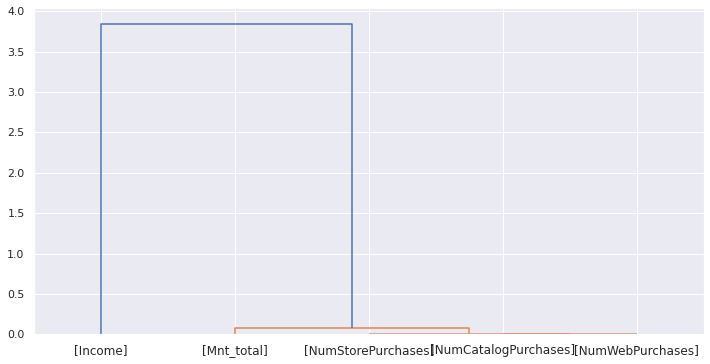

In [143]:
fig = pylab.figure(figsize=(12,6))
def llf(id):
    return '[%s]' % (df_n.index[id] )

dendro = scipy.cluster.hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'top')   

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


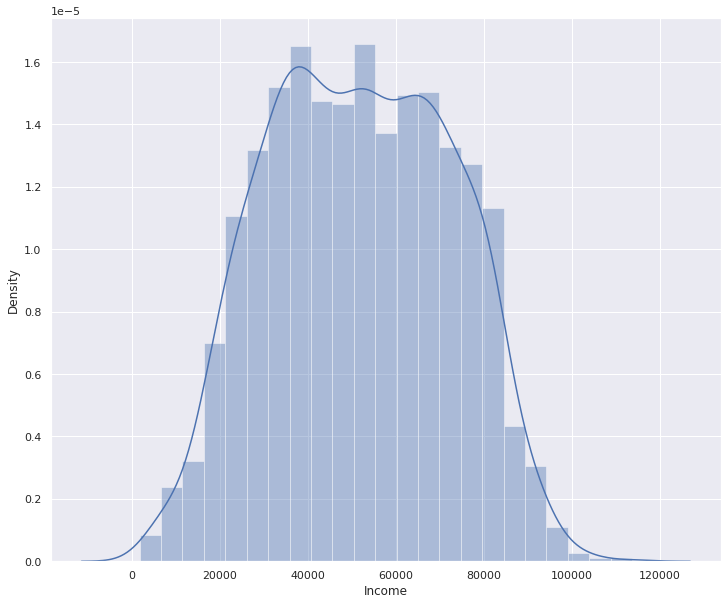

In [144]:
#Analizo indivuadualmente income
fig, axes = plt.subplots(figsize=(12,10))
sns.distplot(df['Income']);

Los ingresos tienen una distribucion del tipo meseta

In [145]:
agglom = AgglomerativeClustering(n_clusters = 2, linkage = 'complete')
agglom.fit(feature_mtx)
agglom.labels_

array([0, 1, 0, 0, 0])

In [146]:
df_n['cluster_'] = agglom.labels_
df_n.head()

,Valores,Sd,Trim,cluster_
labels,,,,
Mnt_total,0.011673,2.906441e-02,0.010140,0
Income,1.000000,1.000000e+00,1.000000,1
NumCatalogPurchases,0.000000,8.481929e-07,0.000000,0
NumStorePurchases,0.000061,2.277135e-05,0.000064,0
NumWebPurchases,0.000028,0.000000e+00,0.000031,0


/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
<ipython-input-147-fb78972a62a8>:5: RuntimeWarning: divide by zero encountered in log


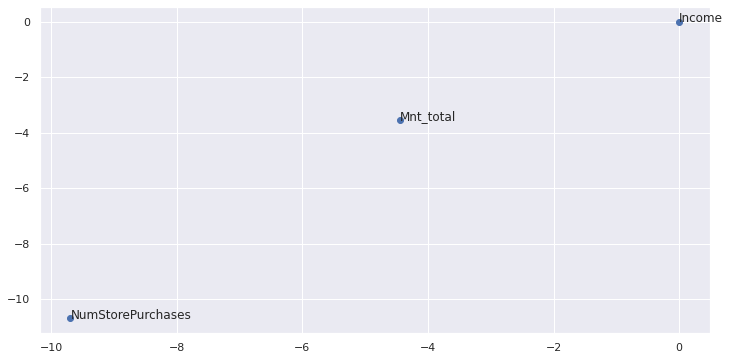

In [147]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(np.log(df_n.Valores), np.log(df_n.Sd))

for i, txt in enumerate(df_n.index):
  ax.annotate(txt, (np.log(df_n.Valores[i]), np.log(df_n.Sd[i])))

###Feature selection II

In [148]:
df_marketing6=df_marketing2 [['Mnt_total','Income', 'NumCatalogPurchases','NumStorePurchases','NumWebPurchases']]

In [149]:
df_marketing6_X = df_marketing6[['Income', 'NumCatalogPurchases','NumStorePurchases','NumWebPurchases']]

In [150]:
df_marketing6_y = df_marketing6[['Mnt_total']]

In [151]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_marketing6_X,df_marketing6_y,test_size=0.2,random_state=2)


El resultado del feature selection es que todas las variables son buenas principalmente NumCatalogPurchases. 
Cuando p-value = 0.05 posee valores menores son aptos para el modelo.

In [152]:
features = X_train.columns
f_scores, p_values = f_regression(X_train, y_train) # el [1] son los p-values.
df_fscores = pd.DataFrame({'features':features,'score':f_scores, 'p-values': p_values})
df_fscores = df_fscores.sort_values('score' , ascending = False )

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [153]:
df_fscores.head(10)

,features,score,p-values
0,Income,3769.767367,0.000000e+00
1,NumCatalogPurchases,2948.811162,0.000000e+00
2,NumStorePurchases,1563.011858,6.800418e-246
3,NumWebPurchases,688.598068,1.400371e-128


In [154]:
df_fscores = df_fscores[df_fscores['score'] > 0.05]
X_sel = X_train[df_fscores['features']]
X_sel.shape


(1782, 4)

<AxesSubplot:>

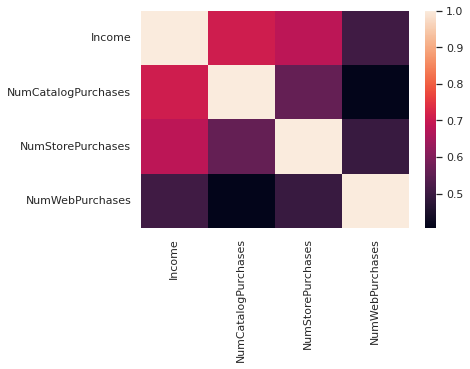

In [155]:
xcorr = X_sel.corr().abs()
heatmap(xcorr)

Las cuatro sonbuenas variables, el orden de mas importante a menos es: 

1 Income

2	NumCatalogPurchases	

3	NumStorePurchases	

4	NumWebPurchases	

##El resultado del análisis exploratorio
Nos permitió descubrir la correlación que existe entre las variables Mnt_total (total gastado) e Income ingresos y NumCatalogPurchases (numero de compras realizadas usando el catálogo). Manteniendo una relación lineal positivo, aumentando en el mismo sentido.
Como asi tambien entre Mnt_total (total gastado) y 'NumCatalogPurchases' (numero de compras realizadas usando el catálogo). 

# Insights


¿Que relación tiene los tipos de compras con las otras variables? Como por ejemplo con los descuentos o el numero de hijos

¿Existe relación entre como **realizan los clientes las compras (web, tienda física o catálogo) y el número de hijos que tienen**? Se puede llegar a pensar que los clientes que tienen hijos, van a preferir comprar por la web o catálogo para ahorrar tiempo. 


En la sección de transformaciones se demuestra que no hay nulos en las variables NumWebPurchases, NumCatalogPurchases, NumCatalogPurchases, Kidhome más Teenhome y, a su vez, todas las variables son números enteros

In [156]:
#describiendo la información sobre la cantidad de hijos totales de los clientes y la cantidad de compras realizaadas por la web
df[["Hijos_totales","NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]].describe(include="all")


,Hijos_totales,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
count,2228.000000,2228.000000,2228.000000,2228.000000
mean,0.890485,4.095601,2.633303,5.807451
std,1.077441,2.775756,2.793235,3.245002
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000
50%,0.000000,4.000000,2.000000,5.000000
75%,2.000000,6.000000,4.000000,8.000000
max,4.000000,27.000000,28.000000,13.000000


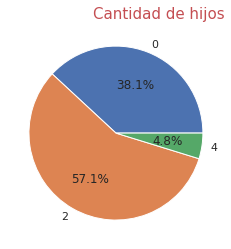

In [157]:
dfEtapa=df.groupby('Hijos_totales').Complain.sum()
plt.pie(dfEtapa,labels=dfEtapa.index, autopct="%.1f%%")
plt.title('Cantidad de hijos',loc="right",color="r",fontsize=15)
plt.show()


De una muesta de 2.232 clientes y donde se asume que ambas variables son cuantitativas discretas, se observa para cada una de las variables: 

1. Hijos totales:  Los clientes tienen desde 0 hasta 4 hijos donde la mayoria tienen 2 hijo por persona.  

2. NumWebPurchases: Los clientes realizan en mayor (75%) proporción 6 compras en la web.

3. NumCatalogPurchases:Los clientes realizan en mayor (75%) proporción 4 compras por catalogo.

4. NumStorePurchases: Los clientes realizan en mayor (75%) proporción 8 compras en tienda.

Para los 3 tipos de compras se observan que los clientes pueden no llegar a comprar bajo ninguna modalidad y que hay clientes que no tienen hijos. 

In [158]:
#estudiamos la correlación
corr_matrix = df.corr(method='spearman')
corr_matrix.loc[ 'Hijos_totales'	, ['NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases']]


NumWebPurchases       -0.425691
NumStorePurchases     -0.561186
NumCatalogPurchases   -0.598407
Name: Hijos_totales, dtype: float64

Existe una correlación negativa entre los clientes que tienen hijos y las compras realizadas por la web, tienda física y catálogo.

Text(0.5, 1.02, 'Relación entre hijos con las compras realizadas en locales, web y catálogo')

<Figure size 1008x1008 with 0 Axes>

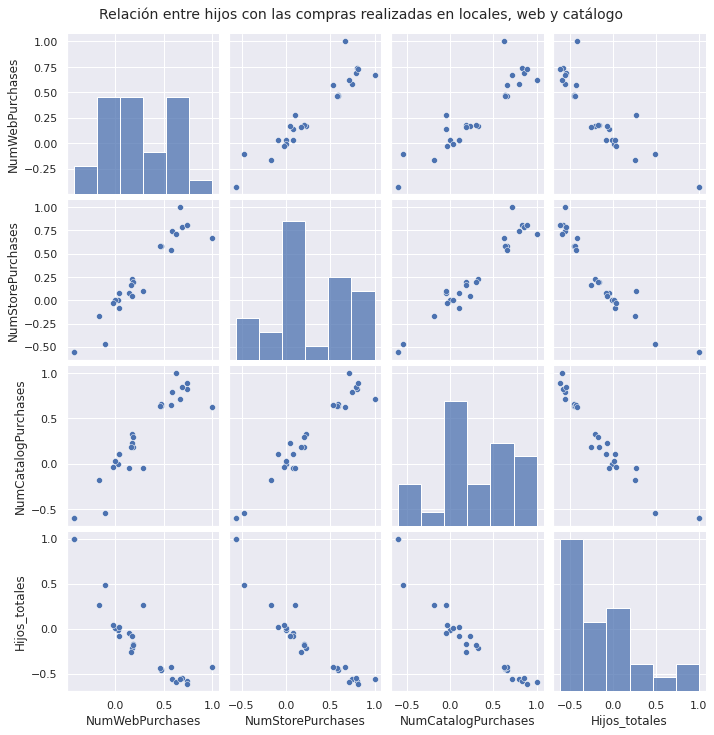

In [159]:
#graficando 
plt.figure(figsize=(14,14))
graf_corr=sns.pairplot(corr_matrix[['NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases','Hijos_totales']]);
graf_corr.fig.suptitle("Relación entre hijos con las compras realizadas en locales, web y catálogo", fontsize=14, y=1.02)

Se concluye que el número de compras realizadas en la web o catálogo no tienden a incrementarse al tener los clientes uno o más hijos. 

¿Podemos decir entonces que las compras están relacionadas con los números de descuentos?


In [160]:
#número de compras totales
df [['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]. sum ()


NumDealsPurchases       5160
NumWebPurchases         9125
NumCatalogPurchases     5867
NumStorePurchases      12939
dtype: int64

Hay 5.160 compras realizadas con descuentos 

In [161]:
df[["NumDealsPurchases","NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]].describe(include="all")


,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
count,2228.000000,2228.000000,2228.000000,2228.000000
mean,2.315978,4.095601,2.633303,5.807451
std,1.894329,2.775756,2.793235,3.245002
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.000000,3.000000
50%,2.000000,4.000000,2.000000,5.000000
75%,3.000000,6.000000,4.000000,8.000000
max,15.000000,27.000000,28.000000,13.000000


In [162]:
#estudiamos la correlación
corr_matrix = df.corr(method='spearman')
corr_matrix.loc[ 'NumDealsPurchases'	, ['NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases']]


NumWebPurchases        0.282418
NumStorePurchases      0.096898
NumCatalogPurchases   -0.045285
Name: NumDealsPurchases, dtype: float64

Las únicas variables que tiene una correlación positiva con el número de compras realizadas con descuento son las compras realizdas por la web y en la tienda física

<AxesSubplot:xlabel='NumDealsPurchases', ylabel='NumWebPurchases'>

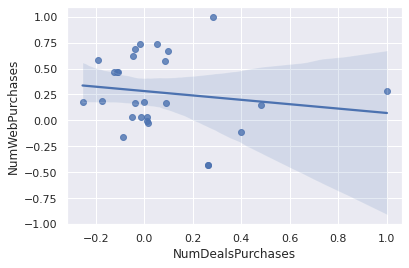

In [163]:
#graficando el número de compras realizadas por la web al tener una correlación mas cerca de uno.
sns.regplot(x=df.corr(method='spearman')["NumDealsPurchases"], y=df.corr(method='spearman')["NumWebPurchases"])


Se concluye que el número de compras realizas por la web tiene una relación débil con el número de compras realizadas con descuentos.

#Buscamos las mejores variables

In [164]:
# vemos que variables tengo object para pasarlas a int
df_marketing2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2228 entries, 0 to 2227
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2228 non-null   int64  
 1   Year_Birth           2228 non-null   int64  
 2   Education            2228 non-null   object 
 3   Marital_Status       2228 non-null   object 
 4   Income               2228 non-null   float64
 5   Kidhome              2228 non-null   int64  
 6   Teenhome             2228 non-null   int64  
 7   Dt_Customer          2228 non-null   object 
 8   Recency              2228 non-null   int64  
 9   NumDealsPurchases    2228 non-null   int64  
 10  NumWebPurchases      2228 non-null   int64  
 11  NumCatalogPurchases  2228 non-null   int64  
 12  NumStorePurchases    2228 non-null   int64  
 13  NumWebVisitsMonth    2228 non-null   int64  
 14  AcceptedCmp3         2228 non-null   int64  
 15  AcceptedCmp4         2228 non-null   i

In [165]:
#A cada categoria le va a poner un valor int para poder hacer el sequential foward selection
enc = OrdinalEncoder()

enc.fit(df_marketing2[['Education', 'Marital_Status', 'Dt_Customer', 'Etapa']])
df_marketing2[['Education', 'Marital_Status', 'Dt_Customer', 'Etapa']] = enc.transform(df_marketing2[['Education', 'Marital_Status', 'Dt_Customer', 'Etapa']])


In [166]:
#sequential foward Selection
#from sklearn.tree import DecisionTreeClassifier
#sfs = SFS(DecisionTreeClassifier(),
#          k_features=12,
#          forward=True,
#          floating=False,
#          scoring='accuracy',
#          cv=3)

In [167]:
#sequential foward Selection
from sklearn.tree import DecisionTreeClassifier
sfs = SFS(DecisionTreeClassifier(),
          k_features=12,
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=3)

In [168]:
#queremos saber cuales variables influyen en el monto total gastado
X = df_marketing2.drop('Mnt_total', 1)
y = df_marketing2['Mnt_total']

<ipython-input-168-bc7b7f4842b8>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [169]:
sfs.fit(X,y)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 me

SequentialFeatureSelector(cv=3, estimator=DecisionTreeClassifier(),
                          k_features=12, scoring='accuracy')

In [170]:
sfs.k_feature_names_

('Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Recency',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'AcceptedCmp3',
 'EDAD',
 'Etapa')

Y como vemos muchas coniciden con la correlación, por ejemplo con compras en web o tienda. Muchas analizamos la relacion que existe como por ejemplo "el monto gastado en relacion con los ingresos". 